# import

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import random
import warnings
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

Reading the Data from File 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# preprocessing 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']),  encoding = 'iso-8859-8' , header= 0)


A. Recognizing and Understanding Data

Detect strange values apart from the NaN Values


In [ ]:
object_col = df.describe(include='O').columns
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: ID
****************************************
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
NaN               9985
Stevex              44
Langep  

Clear strange values apart from the NaN Values


In [ ]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

C. Fixing a data type (value_counts(), astype(), infer_objects(), convert_dtypes())

Detect strange values by Columns Convert Object Types to Numeric Types (int, float, np.int64, pd.Int64Dtype())
Combining object columns

In [ ]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))


In [ ]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [ ]:
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [ ]:
df['Age'] = df.Age.astype(int)  

In [ ]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)

In [ ]:
df['Annual_Income'] = df.Annual_Income.astype(float)


In [ ]:
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 


In [ ]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

In [ ]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

In [ ]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)


In [ ]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)


In [ ]:
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)


Assign Categorical Types to Numeric Types

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Month' , 'Occupation', 'Payment_Behaviour','Credit_Score', 'Payment_of_Min_Amount','Type_of_Loan','Credit_Mix']
# Label encode features
label_encoder = LabelEncoder()
for i in cols :
  df[i] = label_encoder.fit_transform(df[i])
# Print sample of dataset

Combining object columns

In [ ]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [ ]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

##02. Exploratory Data Analysis (EDA)


Detect NaN Values and Fill by Customer_ID Group


A. Reassign Group NaN Values in Object Column

In [ ]:
# Reassign and Show Function
def Reassign_Group_Object_NaN_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
    
    # Run      
    if inplace:  
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning NaN {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [ ]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Name')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Occupation')
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Credit_Mix')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning NaN Name: [NaN    9985
Name: Name, dtype: int64]

Before Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', nan]
[nan, 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', nan, nan, 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', nan]
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', nan]

After Assigning NaN Name: ['No NaN Value']

After Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb']
['Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht'

B. Detect Group Min-Max in Numeric Column Reassign NaN Values

In [ ]:
# Define Outlier Range
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [ ]:
# Reassign Wrong Values and Show Function
def Reassign_Group_Numeric_Wrong_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:   
        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
        print(f'\nBefore Assigning Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
        print(f'\nAfter Assigning  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Age')
get_iqr_lower_upper(df, 'Age')



Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	14,
max:	56

Before Assigning Min, Max Age: ['No NaN Value']

Before Assigning Example Age:

[37, 38, 38, 8153, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48]
[3452, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23]
[43, 44, 44, 44, 44, 44, 44, 44]

After Assigning  Min, Max Age: ['No NaN Value']

After Assigning Example Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
Outliers: (0, 28)


(-3.0, 69.0)

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'SSN')



Existing Min, Max Values:
min        81349.0
max    999993421.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	81349.0,
max:	999993421.0

Before Assigning Min, Max SSN: ['No NaN Value']

Before Assigning Example SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0]
[802194704.0, nan, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0, 802194704.0]
[nan, nan, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0, 891062189.0]
[422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0, 422130011.0]

After Assigning  Min, Max SSN: ['No NaN Value']

After Assigning Example SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 96481271

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Annual_Income')


Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93,
max:	179987.28

Before Assigning Min, Max Annual_Income: ['No NaN Value']

Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning  Min, Max Annual_Income: ['No NaN Value']

After Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 335

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Inhand_Salary')


Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	303.6454166666666,
max:	15204.633333333331

Before Assigning Min, Max Monthly_Inhand_Salary: ['No NaN Value']

Before Assigning Example Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334]
[1496.7425, 1496.7425, 1496.7425, 1496.7425, nan, 1496.7425, 1496.7425, 1496.7425]
[2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333, 2655.035833333333]
[6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666, 6692.636666666666]
[8433.546666666667, 8433.546666666667, 8433.546666666667, 8433.546666666667, 8433.546666666667, 8433.546666666667, 8433.5466

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Bank_Accounts')


Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1,
max:	10

Before Assigning Min, Max Num_Bank_Accounts: ['No NaN Value']

Before Assigning Example Num_Bank_Accounts:

[9, 9, 9, 9, 9, 9, 9, 9]
[3, 3, 3, 1174, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3]

After Assigning  Min, Max Num_Bank_Accounts: ['No NaN Value']

After Assigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	11

Before Assigning Min, Max Num_Credit_Card: ['No NaN Value']

Before Assigning Example Num_Credit_Card:

[6, 6, 6, 6, 6, 6, 6, 6]
[4, 4, 4, 4, 4, 4, 4, 888]
[3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 725, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5]

After Assigning  Min, Max Num_Credit_Card: ['No NaN Value']

After Assigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Interest_Rate')


Existing Min, Max Values:
min       1
max    5797
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	1,
max:	34

Before Assigning Min, Max Interest_Rate: ['No NaN Value']

Before Assigning Example Interest_Rate:

[22, 22, 22, 22, 22, 22, 22, 22]
[10, 10, 10, 10, 10, 10, 10, 10]
[17, 17, 17, 17, 17, 17, 17, 17]
[15, 15, 15, 15, 15, 15, 15, 15]
[5, 5, 5, 5, 5, 5, 5, 5]

After Assigning  Min, Max Interest_Rate: ['No NaN Value']

After Assigning Example Interest_Rate:

[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Loan')


Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0,
max:	9

Before Assigning Min, Max Num_of_Loan: ['No NaN Value']

Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, -100, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3]

After Assigning  Min, Max Num_of_Loan: ['No NaN Value']

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Delay_from_due_date')


Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-5,
max:	62

Before Assigning Min, Max Delay_from_due_date: ['No NaN Value']

Before Assigning Example Delay_from_due_date:

[48, 48, 48, 48, 48, 48, 48, 48]
[19, 19, 19, 19, 19, 19, 19, 16]
[25, 28, 22, 26, 26, 26, 26, 26]
[19, 19, 19, 19, 19, 19, 19, 19]
[15, 15, 20, 16, 20, 20, 20, 24]

After Assigning  Min, Max Delay_from_due_date: ['No NaN Value']

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Existing Min, Max Values:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-2.0,
max:	28.0

Before Assigning Min, Max Num_of_Delayed_Payment: ['No NaN Value']

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, nan, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0]
[11.0, 11.0, 11.0, nan, 11.0, nan, 11.0, 13.0]
[18.0, 18.0, 18.0, 18.0, 18.0, nan, 20.0, 18.0]
[17.0, 16.0, 14.0, nan, 17.0, 14.0, 11.0, 14.0]

After Assigning  Min, Max Num_of_Delayed_Payment: ['No NaN Value']

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Changed_Credit_Limit')


Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-5.01,
max:	29.98

Before Assigning Min, Max Changed_Credit_Limit: ['No NaN Value']

Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28]

After Assigning  Min, Max Changed_Credit_Limit: ['No NaN Value']

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Inquiries')


Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	17.0

Before Assigning Min, Max Num_Credit_Inquiries: ['No NaN Value']

Before Assigning Example Num_Credit_Inquiries:

[nan, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[1.0, 1.0, 1.0, 1.0, 1196.0, 1.0, 1.0, 1.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 692.0]

After Assigning  Min, Max Num_Credit_Inquiries: ['No NaN Value']

After Assigning Example Num_Credit_Inquiries:

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[6.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Outstanding_Debt')


Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.23,
max:	4998.07

Before Assigning Min, Max Outstanding_Debt: ['No NaN Value']

Before Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]
[1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8, 1371.8]

After Assigning  Min, Max Outstanding_Debt: ['No NaN Value']

After Assigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44, 982.44]


In [ ]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Total_EMI_per_month')


Existing Min, Max Values:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	1779.1032538262775

Before Assigning Min, Max Total_EMI_per_month: ['No NaN Value']

Before Assigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 32972.0]
[45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675, 45.74570037068675]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543, 188.45659522353543]
[257.7386460249556, 257.7386460249556, 257.7386460249556, 257.7386460249556, 257.7386460249556, 257.7386460249556, 257.7386460249556, 257.7386460249556]

After Assigning  Min, Max Total_EMI_per_month: ['No 

In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Amount_invested_monthly')


Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	10000.0

Before Assigning Min, Max Amount_invested_monthly: ['No NaN Value']

Before Assigning Example Amount_invested_monthly:

[45.30106826949194, 90.07842318605292, 61.73271462991577, 56.4949816634165, 51.726244263612, 60.82828780912217, 95.6486475869488, 66.71824831147686]
[30.373471914127194, 44.31995483866171, nan, 62.81248610216079, 148.30956484525, 10000.0, 59.30896122323683, 118.54244614778156]
[118.8806978910128, nan, 337.1997406214716, 170.8689598433119, 74.1980692925824, 105.4573791889266, 197.85037247610126, 165.20443547590202]
[149.37725143584314, 146.97809602243544, 101.12020124815511, 492.3974911743151, 264.1791118544216, 261.69017894140734, 200.64143588981403, 126.07161584554541]
[292.2127037381353, nan, 187.59489650806347, 275.635709774446, 487.8062062008502, nan, 124.29952362711306, 481.7990883470461]


In [ ]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Balance')


Existing Min, Max Values:
min   -3.333333e+26
max    1.602041e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26,
max:	1183.9306960885192

Before Assigning Min, Max Monthly_Balance: ['No NaN Value']

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313]
[581.4298200072883, 573.8289754206959, 629.6868701949761, 258.40958026881617, 496.6279595887097, 489.116892501724, 560.1656355533173, 594.7354555975859]
[553.4033169035758, 228.71773015063442, 648.0211241336477, 579

C. End of Cleaning

In [ ]:
df.dropna(inplace = True)
df=df.drop(['Name','ID','Customer_ID','SSN'], axis=1)

End Of Preprocessing

# additional pre

In [ ]:
scaler = StandardScaler()
df1= scaler.fit_transform(df)
df[df.columns] = pd.DataFrame(df1, columns=[df.columns])
df2 = df.dropna()

# Use the sample method to randomly select 15k rows
df2 = df2.sample(n=15000, replace=True, random_state=42)

# k Means

In [ ]:
def remove_values(test_data, remove_percent=0.2):
    # Calculate the number of values to remove per row
    num_values = int(test_data.shape[1] * remove_percent)
    test_check = test_data.copy()
    cells2=[]
    indices = []
    # Loop over each row and remove values at random
    for i in range(len(test_data)):
        # Randomly select the indices of the values to remove
        indices_to_remove = np.random.choice(test_data.shape[1], size=num_values, replace=False)

        # Set the selected values to remove_val
        cells2.append(test_data.iloc[i, indices_to_remove].tolist())
        combinations = [(i, elem) for elem in indices_to_remove]
        indices.append(combinations)
        test_data.iloc[i, indices_to_remove] = -1000
    test_false = test_data.copy()

    return test_data, indices, cells2,test_check,test_false

In [ ]:
# # Calculate the number of values to remove per row
# num_values = int(test_data.shape[1] * 0.2)
# cells2=[]
# indices = []
# # Loop over each row and remove values at random
# for i in range(len(test_data)):
#     # Randomly select the indices of the values to remove
#     indices_to_remove = np.random.choice(test_data.shape[1], size=num_values, replace=False)
    
#     # Set the selected values to -1000
#     cells2.append(test_data.iloc[i, indices_to_remove].tolist())
#     combinations = [(i, elem) for elem in indices_to_remove]
#     indices.append(combinations)
#     test_data.iloc[i, indices_to_remove] = -1000


In [ ]:
# optimal k
from scipy.spatial.distance import cdist

def optimal(data,k):
  inertia = []
  K = range(1, k)
  for k in K:
    kmeans = KMeans(n_clusters=k).fit(train_data)
    inertia.append(sum(np.min(cdist(train_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / train_data.shape[0])
  return np.argmin(inertia) + 1

In [ ]:
def predict_cluster_centers(train_data, test_data, n_clusters=11):
    # Fit KMeans to training data
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(train_data)

    # Identify rows in test data with missing values
    mask = test_data.applymap(lambda x: x == -1000)
    rows_with_value = test_data[mask.any(axis=1)]

    # Predict cluster labels for rows with missing values
    cluster_label = kmeans.predict(rows_with_value)

    # Find the cluster center for each predicted label
    cluster_center = kmeans.cluster_centers_[cluster_label]

    return cluster_center

In [ ]:
# kmeans = KMeans(n_clusters=11, random_state=42)
# kmeans.fit(train_data)
# mask = test_data.applymap(lambda x: x == -1000)
# rows_with_value = test_data[mask.any(axis=1)]
# cluster_label = kmeans.predict(rows_with_value)
# cluster_center = kmeans.cluster_centers_[cluster_label]



In [ ]:
def flatten(lst):
    result = []
    for elem in lst:
        if isinstance(elem, list):
            result.extend(flatten(elem))
        else:
            result.append(elem)
    return result

In [ ]:
def fill_missing_values(test_data, flat_list, cluster_center,test_check):
    # Fill in missing values with cluster centers
    for i in flat_list:
        test_data.iloc[i[0], i[1]] = cluster_center[i[0], i[1]]

    # Extract filled-in values from test data
    cells = np.array([test_data.iloc[i[0], i[1]] for i in flat_list])
    cells2 = np.array([test_check.iloc[i[0], i[1]] for i in flat_list])
    return cells, cells2,test_data

In [ ]:
def mean_square_error(array1, array2):
    diff = array1 - array2 
    sq_diff = diff ** 2
    mse = np.mean(sq_diff)
    return mse

# Run K means

In [ ]:
def run_kmeans(df, test_size, remove_ratio, k):
    # Split the data into train and test sets
    train_data, test_data = train_test_split(df, test_size=test_size)
    

    # Remove values from test_data
    test_data, indices, cells2, test_check, test_false = remove_values(test_data, remove_ratio)

    # Predict cluster centers
    cluster_center = predict_cluster_centers(train_data, test_data, k)

    # Use the flatten function to extract all elements
    flat_list = flatten(indices)
    cells2 = flatten(cells2)

    # Fill missing values
    cells, cells2, test_data = fill_missing_values(test_data, flat_list, cluster_center,test_check)

    # Calculate mean squared error
    mse = mean_square_error(cells[:2], cells2[:2])

    return mse

In [ ]:
# train_data, test_data = train_test_split(df2, test_size=0.010028883183568678)
# test_data, indices, cells2,test_check,test_false = remove_values(test_data,0.2)
# cluster_center = predict_cluster_centers(train_data,test_data,11)
# # use the flatten function to extract all elements
# flat_list = flatten(indices)
# cells2 = flatten(cells2)
# cells, cells2,test_data = fill_missing_values(test_data,flat_list,cluster_center)
# mean_square_error(cells[:2],cells2[:2])

# opt


# k means mean

In [ ]:
def split_and_shuffle_data(df, test_size=0.010028883183568678):
    # Split the data into training and testing sets
    train_d, test_d = train_test_split(df, test_size=test_size)
    
    # Shuffle the training data
    shuffled = train_d.sample(frac=1)
    
    # Split the shuffled data into four subsets
    result = np.array_split(shuffled, 4)
    
    # Return the four subsets
    return result[0], result[1], result[2], result[3] , test_d

In [ ]:
def kmeanfunc(data):
  #opt_k = optimal(data,k)
  kmeans = KMeans(n_clusters=8, random_state=42)
  kmeans.fit(data)
  return kmeans.cluster_centers_

In [ ]:
def stack_arrays_vertically(arr1, arr2, arr3, arr4):
    # Stack the arrays vertically using numpy.stack()
    stacked_arr = np.concatenate((arr1, arr2, arr3, arr4), axis=0)
    
    # Convert the stacked array to a pandas DataFrame
    stacked_df = pd.DataFrame(stacked_arr)
    
    # Return the stacked DataFrame
    return stacked_df

# Run K means mean

In [ ]:
def run_kmeans_mean(df, split_ratio, remove_ratio, k):
    # Split and shuffle data
    arr1, arr2, arr3, arr4, test_data = split_and_shuffle_data(df, split_ratio)

    # Apply k-means function to each split
    arr1 = kmeanfunc(arr1)
    arr2 = kmeanfunc(arr2)
    arr3 = kmeanfunc(arr3)
    arr4 = kmeanfunc(arr4)

    # Stack arrays vertically
    stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)

    # Remove values from test_data
    test_data, indices, cells2, test_check, test_false = remove_values(test_data, remove_ratio)

    # Predict cluster centers
    cluster_center = predict_cluster_centers(stacked_df, test_data, k)

    # Use the flatten function to extract all elements
    flat_list = flatten(indices[:1000])
    cells2 = flatten(cells2[:1000])

    # Fill missing values
    cells, cells2, test_data = fill_missing_values(test_data, flat_list, cluster_center,test_check)

    # Calculate mean squared error
    mse = mean_square_error(cells[:2], cells2[:2])

    return mse

In [ ]:
# arr1,arr2,arr3,arr4,test_data= split_and_shuffle_data(df2,0.2)
# arr1 = kmeanfunc(arr1)
# arr2 = kmeanfunc(arr2)
# arr3 = kmeanfunc(arr3)
# arr4 = kmeanfunc(arr4)
# stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)
# test_data, indices, cells2,test_check,test_false = remove_values(test_data,0.2)
# cluster_center = predict_cluster_centers(stacked_df,test_data,8)
# # use the flatten function to extract all elements
# flat_list = flatten(indices[:1000])
# cells2 = flatten(cells2[:1000])
# cells, cells2,test_data = fill_missing_values(test_data,flat_list,cluster_center)
# mean_square_error(cells[:2],cells2[:2])

# k means center

In [ ]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


def k_centers(df, k):
    points = df.to_numpy()
    centers = [points[np.random.randint(len(points))]]  # Initialize with a random point as the first center
    while len(centers) < k:
        max_distance = -1
        max_distance_point = None
        
        for point in points:
            _, distance = find_closest_center(point, centers)
            if distance > max_distance:
                max_distance = distance
                max_distance_point = point
                
        centers.append(max_distance_point)
        
    return np.array(centers)

def find_closest_center(point, centers):
    min_distance = float('inf')
    closest_center = None
    
    for center in centers:
        if center is not None:
            distance = euclidean_distance(point, center)
            if distance < min_distance:
                min_distance = distance
                closest_center = center
                
    return closest_center, min_distance

def mse_before_after_replacement(df, centers,remove_percent=0.2):
    original_values = []
    replaced_values = []
    indices = []
    num_values = int(df.shape[1] * remove_percent)

    for i in range(len(df)):
        # Randomly select the indices of the values to remove
        indices_to_remove = np.random.choice(df.shape[1], size=num_values, replace=False)

        # Set the selected values to remove_val
        combinations = [(i, elem) for elem in indices_to_remove]
        indices.append(combinations)
    indices = flatten(indices)
    for idx in indices:
        row, col = idx
        original_value = df.iloc[row, col]
        
        closest_center, _ = find_closest_center(df.iloc[row].to_numpy(), centers)
        
        if closest_center is not None:
            replaced_value = closest_center[col]
            replaced_values.append(replaced_value)
            original_values.append(original_value)
            df.at[row, df.columns[col]] = replaced_value
    mse = np.mean((np.array(original_values) - np.array(replaced_values)) ** 2)
    return mse



In [ ]:
# import random;
# import time
# def greedy(vertexes, k):
# 	s = [];
# 	pick = randomPick(vertexes);
# 	s.append(pick)
# 	while len(s) < k:
# 		max = distance(vertexes, s)
# 		vertexes.remove(max)
# 		s.append(max)
# 	return s

In [ ]:
# def randomPick(vertexes):
# 	# rndm plz ;)
# 	pick = random.sample(vertexes, 1)[0]
# 	vertexes.remove(pick)
# 	return pick

In [ ]:
# def distance(vertexes, picked):
# 	min = np.inf 
# 	min_v = None
# 	real_max = 0
# 	real_max_v = None
# 	for v in vertexes:
# 		min = np.inf
# 		for p in picked:	
# 			d = np.sqrt((v.x - p.x)**2 + (v.y - p.y)**2)
# 			print("current min %s vs %d" % (min, d))
# 			if d < min:
# 				min = d
# 				min_v = v
# 		if min > real_max:
# 			real_max = min 
# 			real_max_v = min_v
# 	return real_max_v

In [ ]:
# def randomVertex(min, max):
# 	return Vertex(random.randint(min, max), random.randint(min, max))

In [ ]:
# class Vertex:
# 	def __init__(self, x, y):
# 		self.x = x
# 		self.y = y

# 	def __str__(self):
# 		return "(%s,%s)" % (self.x, self.y)

# 	def __repr__(self):
#                 return "(%s,%s)" % (self.x, self.y)

# 	def points(self):
# 		return [self.x, self.y]


In [ ]:
# def main():
#     min = 0
#     max = 200
#     vertexes = set()
#     for i in range(0, 100):
#         vertexes.add(randomVertex(min, max))
#     greed = greedy(vertexes, 10)
#     return greed

# Run K means center

In [ ]:
def run_kmeans_center(df, split_ratio, k, remove_ratio):
    # Split and shuffle data
    arr1, arr2, arr3, arr4, test_data = split_and_shuffle_data(df, split_ratio)

    # Apply k-means function to each split
    arr1 = kmeanfunc(arr1)
    arr2 = kmeanfunc(arr2)
    arr3 = kmeanfunc(arr3)
    arr4 = kmeanfunc(arr4)

    # Stack arrays vertically
    stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)

    # Apply k-centers algorithm
    cluster_center = k_centers(stacked_df, k)

    # Calculate mean squared error before and after replacement
    mse = mse_before_after_replacement(test_data, cluster_center, remove_ratio)

    return mse


In [ ]:
# arr1,arr2,arr3,arr4,test_data = split_and_shuffle_data(df2,0.010028883183568678)
# arr1 = kmeanfunc(arr1)
# arr2 = kmeanfunc(arr2)
# arr3 = kmeanfunc(arr3)
# arr4 = kmeanfunc(arr4)
# stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)
# cluster_center = k_centers(stacked_df, 50)
# mse_before_after_replacement(test_data, cluster_center, 0.2)

# RUN K centers mean


In [ ]:
def run_kcenters_mean(df, split_ratio, k, remove_ratio):
    # Split and shuffle data
    arr1, arr2, arr3, arr4, test_data = split_and_shuffle_data(df, split_ratio)

    # Apply k-centers algorithm to each split
    arr1 = k_centers(arr1, k)
    arr2 = k_centers(arr2, k)
    arr3 = k_centers(arr3, k)
    arr4 = k_centers(arr4, k)

    # Stack arrays vertically
    stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)

    # Apply k-means function
    cluster_center = kmeanfunc(stacked_df)

    # Calculate mean squared error before and after replacement
    mse = mse_before_after_replacement(test_data, cluster_center, remove_ratio)

    return mse

In [ ]:
# arr1,arr2,arr3,arr4,test_data = split_and_shuffle_data(df2,0.010028883183568678)
# arr1 = k_centers(arr1,10)
# arr2 = k_centers(arr2,10)
# arr3 = k_centers(arr3,10)
# arr4 = k_centers(arr4,10)
# stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)
# cluster_center = kmeanfunc(stacked_df)
# mse_before_after_replacement(test_data, cluster_center, 0.2)

# Run K centers center

In [ ]:
def run_kcenters_center(df, split_ratio, k, remove_ratio):
    # Split and shuffle data
    arr1, arr2, arr3, arr4, test_data = split_and_shuffle_data(df, split_ratio)

    # Apply k-centers algorithm to each split
    arr1 = k_centers(arr1, k)
    arr2 = k_centers(arr2, k)
    arr3 = k_centers(arr3, k)
    arr4 = k_centers(arr4, k)

    # Stack arrays vertically
    stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)

    # Apply k-centers algorithm to stacked_df
    cluster_center = k_centers(stacked_df, k)

    # Calculate mean squared error before and after replacement
    mse = mse_before_after_replacement(test_data, cluster_center, remove_ratio)

    return mse


In [ ]:
# arr1,arr2,arr3,arr4,test_data = split_and_shuffle_data(df2,0.010028883183568678)
# arr1 = k_centers(arr1,10)
# arr2 = k_centers(arr2,10)
# arr3 = k_centers(arr3,10)
# arr4 = k_centers(arr4,10)
# stacked_df = stack_arrays_vertically(arr1, arr2, arr3, arr4)
# cluster_center = k_centers(stacked_df,10)
# mse_before_after_replacement(test_data, cluster_center, 0.2)

# graph

In [ ]:
# kmeans20 = []
# kmeans40 = []
# kmeans60 = []
# kmeans80 = []

# kmeansmean20 = []
# kmeansmean40 = []
# kmeansmean60 = []
# kmeansmean80 = []

# kmeanscenter20 = []
# kmeanscenter40 = []
# kmeanscenter60 = []
# kmeanscenter80 = []

# kcentercenter20 = []
# kcentercenter40 = []
# kcentercenter60 = []
# kcentercenter80 = []

# kcentermean20 = []
# kcentermean40 = []
# kcentermean60 = []
# kcentermean80 = []

In [ ]:
for i in range(22):
  kmeans20.append(run_kmeans(df2, 0.15, 0.2, 6))
  kmeans40.append(run_kmeans(df2, 0.15, 0.4, 6))
  kmeans60.append(run_kmeans(df2, 0.15, 0.6, 6))
  kmeans80.append(run_kmeans(df2, 0.15, 0.8, 6))

In [ ]:
for i in range(22):
  kmeansmean20.append(run_kmeans_mean(df2, 0.15, 0.2, 6))
  kmeansmean40.append(run_kmeans_mean(df2, 0.15, 0.4, 6))
  kmeansmean60.append(run_kmeans_mean(df2, 0.15, 0.6, 6))
  kmeansmean80.append(run_kmeans_mean(df2, 0.15, 0.8, 6))

In [ ]:
for i in range(22):
  kmeanscenter20.append(run_kmeans_center(df2, 0.15, 6,0.2))
  kmeanscenter40.append(run_kmeans_center(df2, 0.15, 6,0.4))
  kmeanscenter60.append(run_kmeans_center(df2, 0.15, 6,0.6))
  kmeanscenter80.append(run_kmeans_center(df2, 0.15, 6,0.8))

In [ ]:
for i in range(6):
  kcentercenter20.append(run_kcenters_center(df2, 0.15, 6,0.2))
  kcentercenter40.append(run_kcenters_center(df2, 0.15, 6,0.4))
  kcentercenter60.append(run_kcenters_center(df2, 0.15, 6,0.6))
  kcentercenter80.append(run_kcenters_center(df2, 0.15, 6,0.8))

In [ ]:
for i in range(10):
  kcentermean20.append(run_kcenters_mean(df2, 0.15, 6,0.2))
  kcentermean40.append(run_kcenters_mean(df2, 0.15, 6,0.4))
  kcentermean60.append(run_kcenters_mean(df2, 0.15, 6,0.6))
  kcentermean80.append(run_kcenters_mean(df2, 0.15, 6,0.8))

In [ ]:
# Assuming your 20 lists are in a variable called `lists`
lists = []
lists.append(kmeans20)
lists.append(kmeans40)
lists.append(kmeans60)
lists.append(kmeans80)
lists.append(kmeansmean20)
lists.append(kmeansmean40)
lists.append(kmeansmean60)
lists.append(kmeansmean80)
lists.append(kmeanscenter20)
lists.append(kmeanscenter40)
lists.append(kmeanscenter60)
lists.append(kmeanscenter80)
lists.append(kcentercenter20)
lists.append(kcentercenter40)
lists.append(kcentercenter60)
lists.append(kcentercenter80)
lists.append(kcentermean20)
lists.append(kcentermean40)
lists.append(kcentermean60)
lists.append(kcentermean80)

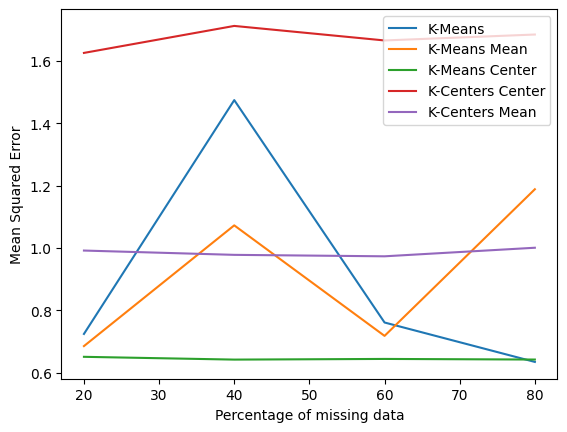

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats


def remove_outliers(data):
    z_scores = np.abs(stats.zscore(data))
    return data[(z_scores < 2)]

# Remove outliers and calculate mean and sd for each list
means = []
sds = []
i = 0
for data in lists:
    i = i+1
    data_array = np.array(data)  # Convert the list to a NumPy array
    filtered_data = remove_outliers(data_array)
    means.append(np.mean(filtered_data))
    sds.append(np.std(filtered_data))

# Group every 4 means in one array
grouped_means = [means[i:i+4] for i in range(0, len(means), 4)]
grouped_sds = [sds[i:i+4] for i in range(0, len(sds), 4)]

# Plot the 5 arrays in one graph
x_ticks = [20, 40, 60, 80]
group_names = ["K-Means", "K-Means Mean", "K-Means Center", "K-Centers Center", "K-Centers Mean"]

for i, (group, name) in enumerate(zip(grouped_means, group_names)):
    plt.plot(x_ticks, group, label=name)

plt.xlabel("Percentage of missing data")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


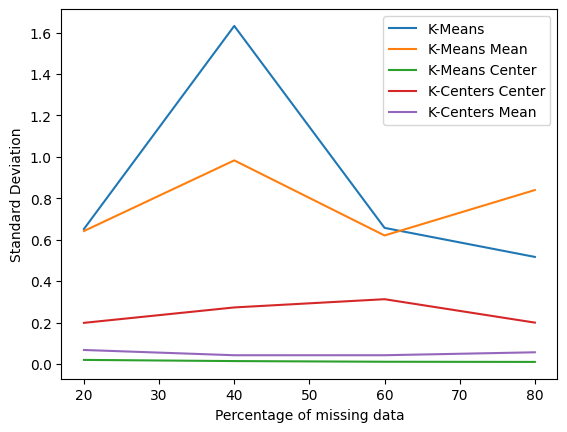

In [ ]:
for i, (group, name) in enumerate(zip(grouped_sds, group_names)):
    plt.plot(x_ticks, group, label=name)
plt.xlabel("Percentage of missing data")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(lists).transpose()

# Name the columns
column_names = [f"List {i+1}" for i in range(len(lists))]
df.columns = column_names

# Export the DataFrame to an Excel file
excel_file = "K-Means K-Means Mean K-Means Center K-Centers Center K-Centers Mean.xlsx"
df.to_excel(excel_file, engine='openpyxl', index=False)

# To download the file in Google Colab
from google.colab import files
files.download(excel_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2.shape

(99712, 24)